In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler,Normalizer, RobustScaler
from sklearn.pipeline import make_pipeline

In [24]:
iris=datasets.load_iris()

In [25]:
X=iris.data
y=iris.target

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion:
- ward, minimizes the variance of the clusters being merged;
- average, uses the average of the distances of each observation of the two sets
- complete or maximum linkage, uses the maximum distances between all observations of the two sets

In [34]:
# ('ward', 'average', 'complete','single')
clustering = AgglomerativeClustering(linkage="complete", n_clusters=3)
model=clustering.fit(X)

In [31]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

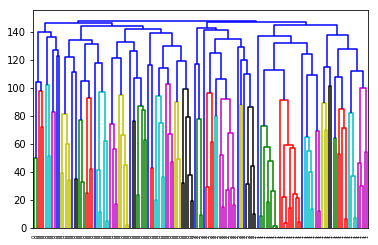

In [35]:
plot_dendrogram(model,labels=model.labels_)
plt.show()

In [38]:
eval_df=pd.DataFrame({'labels': model.labels_, 'target':y})
pd.crosstab(eval_df['labels'],eval_df['target'])

target,0,1,2
labels,,,
0,0,23,49
1,50,0,0
2,0,27,1


In [60]:
### Normalization
normalizer = Normalizer()
model = AgglomerativeClustering(linkage="ward", n_clusters=3)
pipeline = make_pipeline(normalizer,model)
labels=pipeline.fit_predict(X)
#labels=pipeline.predict(X)
eval_df = pd.DataFrame({'labels': labels, 'target': iris.target})
pd.crosstab(eval_df['labels'],eval_df['target'])

target,0,1,2
labels,,,
0,0,48,4
1,50,0,0
2,0,2,46
